In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b= 0.023
zR = b / 2     # [m] Rayleigh Range
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus



pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : b/2,             # [m] Rayleigh range
            'delta_k': 2/b,        #Phase matching
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe': 25}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params = {**pulse_params, **harm_params, **sol_params}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)


In [4]:
Psamples = 50
Prange = (1, 80) # [Torr]
PXe = np.linspace(Prange[0], Prange[1], Psamples)
Pscan = xr.DataArray(PXe, 
                     dims = ('PXe'), 
                     attrs = {'units': 'Torr',
                              'long_name': "Partial Pressure of Xenon"})

In [5]:
rempi_pseudo_scanned = scan_builder(single_func, params, [Pscan])(params=params)

detected_118.data:  <xarray.DataArray 'beam_118' ()>
array(1.07267105e+32, dtype=float128)
Attributes:
    units:      V/m
    long_name:  118 nm amplitude
detected_118.data type:  <class 'xarray.core.dataarray.DataArray'>
detected_118.data:  <xarray.DataArray 'beam_118' ()>
array(7.25648839e+32, dtype=float128)
Attributes:
    units:      V/m
    long_name:  118 nm amplitude
detected_118.data type:  <class 'xarray.core.dataarray.DataArray'>
detected_118.data:  <xarray.DataArray 'beam_118' ()>
array(1.86680895e+33, dtype=float128)
Attributes:
    units:      V/m
    long_name:  118 nm amplitude
detected_118.data type:  <class 'xarray.core.dataarray.DataArray'>
detected_118.data:  <xarray.DataArray 'beam_118' ()>
array(3.47647189e+33, dtype=float128)
Attributes:
    units:      V/m
    long_name:  118 nm amplitude
detected_118.data type:  <class 'xarray.core.dataarray.DataArray'>
detected_118.data:  <xarray.DataArray 'beam_118' ()>
array(5.48382177e+33, dtype=float128)
Attributes:
    u

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


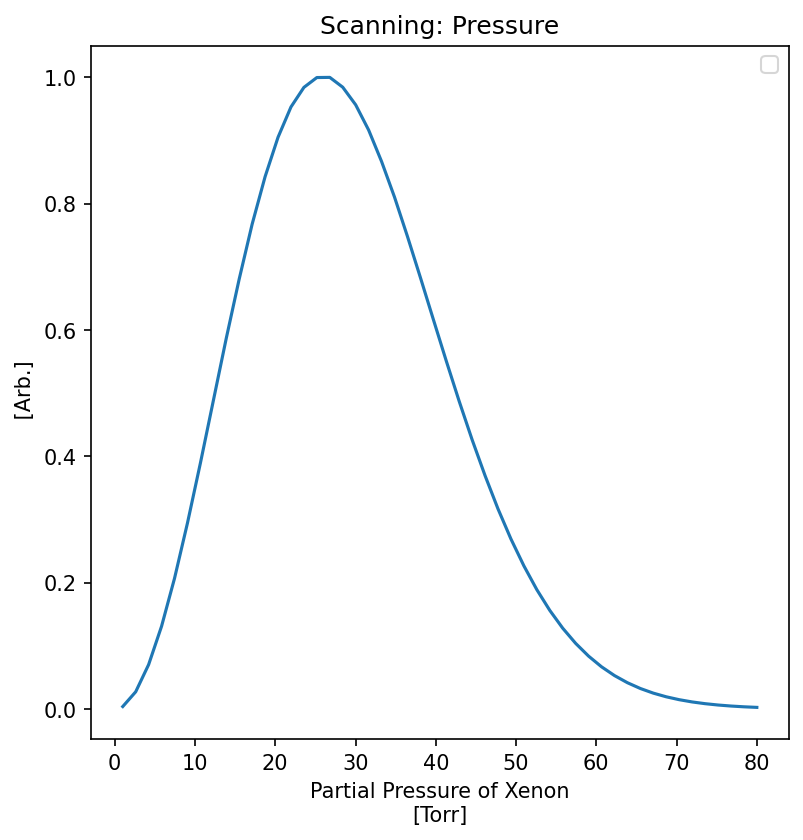

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), dpi=150)
plot_pressure_scan(rempi_pseudo_scanned, ax, selections={'variable': '118 signal'})